### Student Information
Name:劉政諺

Student ID:b1123088

GitHub ID:ericliuhaha

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

<h1>ALL DONE IN COLAB and use TA's helpers function (nothing change)

# Phase 1

In [3]:
### Begin Assignment Here

In [4]:
!pip3 install PAMI

In [5]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
datapath = "/content/newdataset/Reddit-stock-sentiment.csv"

import pandas as pd


df = pd.read_csv(datapath)
display(df.head())


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [7]:
print(df.columns)
print()
print('total is:',df.shape[1])

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

total is: 16


In [8]:
len(df)

847

In [9]:
print(df['title'][0])
print(df['title'][1])
print(df['title'][2])

Retardation is on the menu boys! WSB is so back
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?


In [10]:
list(df['label'][0:10])

[-1.0, 0.0, 0.0, 1.0, -1.0, 0.0, -1.0, 0.0, 1.0, 1.0]

In [11]:
for index in range(10):
    print("\n".join(df['text'][index].split("\n")))
    print()
    print("-------------------------next----------------------------")
    print()

Calls on retards

-------------------------next----------------------------

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

-------------------------next----------------------------

Seeing lots of red in the ticker.

-------------------------next----------------------------

Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and D

In [12]:
# add nothing to the dataframe
df['nothing'] = len(df)*[0]

In [13]:
df[:10][["text","title","label"]]

,text,title,label
0,Calls on retards,Retardation is on the menu boys! WSB is so back,-1.0
1,Stunt as in like why did they even make a big ...,Retail giant TARGET has now declined for 10 co...,0.0
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0
3,Vision Marine Technologies Inc. is rewriting t...,Who knows more? $VMAR,1.0
4,He didn’t say thank you.,The Trump administration is begging Xi Jinping...,-1.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",Weekend Discussion Thread for the Weekend of A...,0.0
6,Trump will respond to china increasing their t...,Is the market in complete denial right now?,-1.0
7,Confirmed not a trap. Its been like this for p...,Retardation is on the menu boys! WSB is so back,0.0
8,Am I the only one seeing the cup & handle brea...,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,HLGN is $10. Hurry and catch it now before it ...,Any cheap stocks under $10?,1.0


In [14]:
df.loc[:10, 'text']

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
5,"Hoping to ejaculate in wet warm puss tonight, ..."
6,Trump will respond to china increasing their t...
7,Confirmed not a trap. Its been like this for p...
8,Am I the only one seeing the cup & handle brea...
9,HLGN is $10. Hurry and catch it now before it ...


In [15]:
df.iloc[:10, 0]

,type
0,comment
1,comment
2,comment
3,post
4,comment
5,comment
6,comment
7,comment
8,comment
9,comment


In [16]:
df.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [17]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

#found downvotes,upvote_ratio has

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [18]:
print(df['downvotes'].unique())
print(df['upvote_ratio'].unique())


[nan  0.  4. 11.  1.]
[ nan 0.98 1.   0.95 0.92 0.91 0.99 0.93 0.5  0.84]


In [19]:
df['downvotes'].value_counts()

,count
downvotes,
0.0,60
1.0,2
4.0,1
11.0,1


In [20]:
df['upvote_ratio'].value_counts()

,count
upvote_ratio,
1.00,52
0.91,3
0.98,2
0.99,2
0.95,1
0.92,1
0.93,1
0.50,1
0.84,1


In [21]:
df['downvotes'] = df['downvotes'].fillna(float(0.0))
df['upvote_ratio'] = df['upvote_ratio'].fillna(float(1.00))

In [22]:
sum(df.duplicated())

0

In [23]:
df_sample = df.sample(n=len(df)//2) # Sample all rows

In [24]:
len(df_sample)

423

In [25]:
df_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
429,comment,2025-04-10 15:23:56,mmehq9i,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,No_Succotash890,https://www.reddit.com/r/stocks/comments/1jvzr...,1,0.0,1.0,Inside traitor,0.000000,0.000000,0.0,['traitor'],-1.0,0
435,comment,2025-04-11 13:35:04,mmk6w2b,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,Huge-Group8652,https://i.redd.it/31r650bss4ue1.jpeg,1,0.0,1.0,a month ago I typed out a list of everything t...,0.000000,0.000000,0.0,"['book', 'month', 'everything', 'ChatGPT', 'li...",0.0,0
112,comment,2023-12-19 19:19:55,ke2q751,stockstobuytoday,Anyone been looking into OneMedNet?,OkRideMeThenBB,https://www.reddit.com/r/stockstobuytoday/comm...,0,0.0,1.0,"nice, good info, good post.",0.733333,0.666667,1.0,"['info', 'post']",1.0,0
687,comment,2025-04-11 15:34:37,mmkunla,stocks,US consumer sentiment plummets to second-lowes...,Askew_2016,https://www.reddit.com/r/stocks/comments/1jwr3...,1,0.0,1.0,Trump inherited millions of dollars and is dum...,0.666667,-0.225000,-1.0,"['savvy', 'business', 'Trump', 'brick', 'pitch']",-1.0,0


In [26]:
df_sample.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Category distribution'}, xlabel='label'>

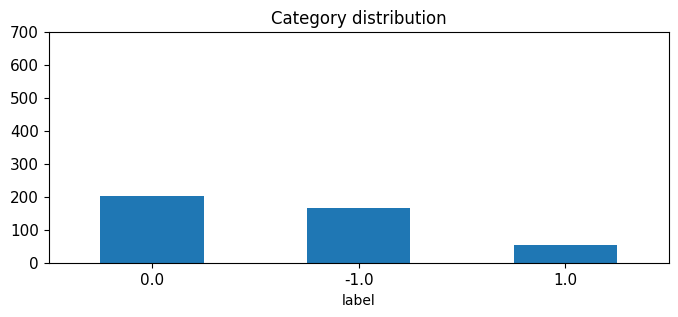

In [27]:
import matplotlib.pyplot as plt

df_sample['label'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

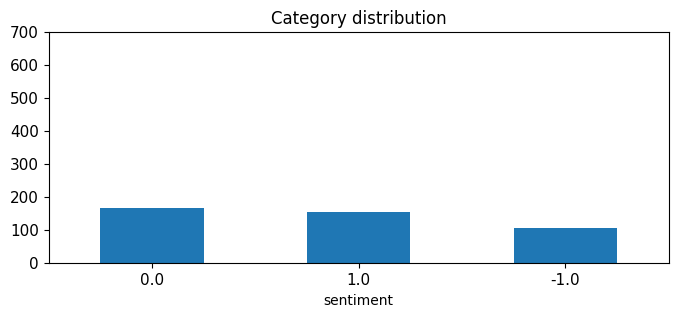

In [28]:
df_sample['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))

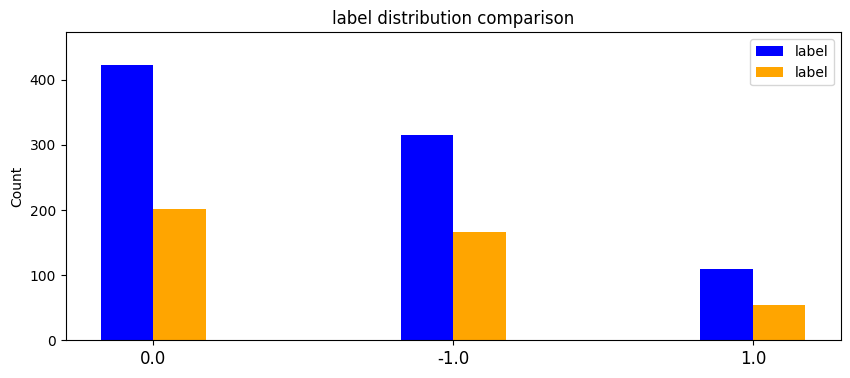

In [29]:
# 取 category 名稱
categories = df['label'].value_counts().index

# 兩組資料的 counts
counts_X = df['label'].value_counts().reindex(categories)
counts_X_sample = df_sample['label'].value_counts().reindex(categories)

# x 軸位置
x = np.arange(len(categories))
width = 0.35  # 柱寬

fig, ax = plt.subplots(figsize=(10,4))
# 畫兩組柱狀圖
rects1 = ax.bar((x - width/4), counts_X, width/2, label='label', color='blue')
rects2 = ax.bar((x + width/4), counts_X_sample, width/2, label='label', color='orange')

# 加標題、x軸標籤
ax.set_ylabel('Count')
ax.set_title('label distribution comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, fontsize=12)
ax.set_ylim(0, max(counts_X.max(), counts_X_sample.max()) + 50)
ax.legend()

plt.show()

In [30]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
df[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,1.00,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.00,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,1.00,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,1.00,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,0


In [32]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [33]:
df['unigrams']

,unigrams
0,"[Calls, on, retards]"
1,"[Stunt, as, in, like, why, did, they, even, ma..."
2,"[Seeing, lots, of, red, in, the, ticker, .]"
3,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,"[He, didn, ’, t, say, thank, you, .]"
...,...
842,"[Invest, now, it, is, going, to, shoot, up, to..."
843,"[Where, can, I, read, this, ?]"
844,"[Upgrades, ,, Downgrades, [, Stock, Analyst, R..."
845,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['text']) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [35]:
# Display the learned vocabulary
print("Vocabulary:")
print(count_vect.vocabulary_)

# Display the shape of the document-term matrix
print("\nShape of the document-term matrix:")
print(df_counts.shape)


#???????應該沒錯

Vocabulary:
{'calls': 692, 'on': 2706, 'retards': 3248, 'stunt': 3696, 'as': 388, 'in': 2024, 'like': 2310, 'why': 4244, 'did': 1168, 'they': 3858, 'even': 1409, 'make': 2402, 'big': 538, 'deal': 1083, 'about': 175, 'starting': 3628, 'it': 2161, 'the': 3848, 'first': 1568, 'place': 2878, 'no': 2645, 'company': 887, 'should': 3477, 'ever': 1412, 'talk': 3795, 'politics': 2918, 'seeing': 3386, 'lots': 2370, 'of': 2687, 'red': 3150, 'ticker': 3888, 'vision': 4145, 'marine': 2422, 'technologies': 3823, 'inc': 2026, 'is': 2149, 'rewriting': 3263, 'watercraft': 4190, 'rulebook': 3313, 'their': 3849, 'collaboration': 856, 'with': 4271, 'shaun': 3437, 'torrente': 3930, 'has': 1837, 'achieved': 195, 'unthinkable': 4066, 'blazing': 560, '116': 18, 'mph': 2560, 'water': 4189, 'this': 3866, 'isn': 2154, 'just': 2197, 'speed': 3585, 'propelling': 3014, 'electric': 1329, 'boating': 576, 'into': 2117, 'new': 2622, 'era': 1388, 'cutting': 1054, 'edge': 1303, 'technology': 3824, 'combined': 863, 'skill

In [36]:
count_vect.get_feature_names_out()[4300]

'wouldn'

In [37]:
count_vect.get_feature_names_out()[4300]

'wouldn'

In [38]:
df_counts.shape

(847, 4346)

In [39]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [40]:
import numpy as np

arr = df_counts[0:5, 0:100].toarray()

positions = np.argwhere(arr == 1)

# Get the feature names (words) from the CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Map the column indices from the positions to the feature names
positions_words = [(row, feature_names[col]) for row, col in positions]

print("Positions of '1' and corresponding words (row, word):")
print(positions_words)

Positions of '1' and corresponding words (row, word):
[]


In [41]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [42]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

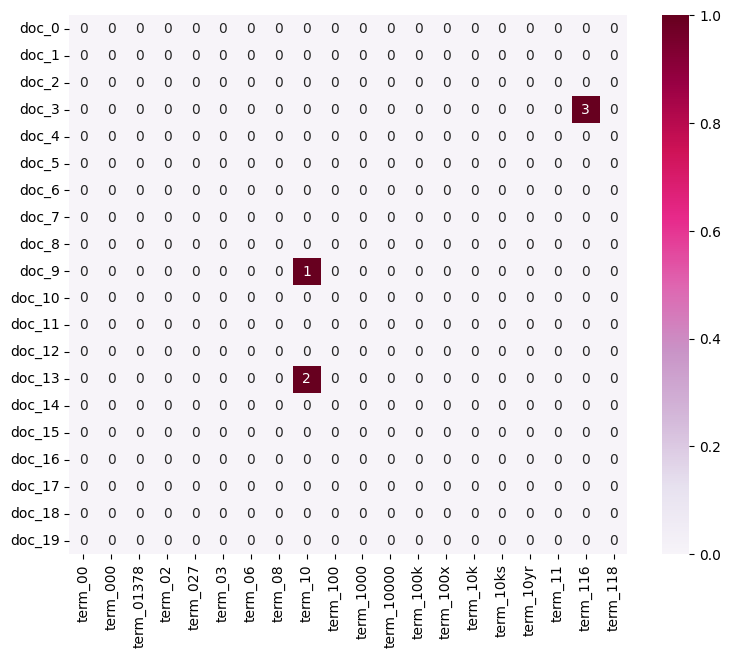

In [43]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

出現頻率最高的 10 個詞：
116: 3
10: 3
11: 0
118: 0
10yr: 0
10ks: 0
100x: 0
10k: 0
100k: 0
10000: 0
前 10 篇文檔的詞數： [  3  26   7 155   5  11  49  21  34  14]
矩陣密度: 0.004671 (非零元素比例)


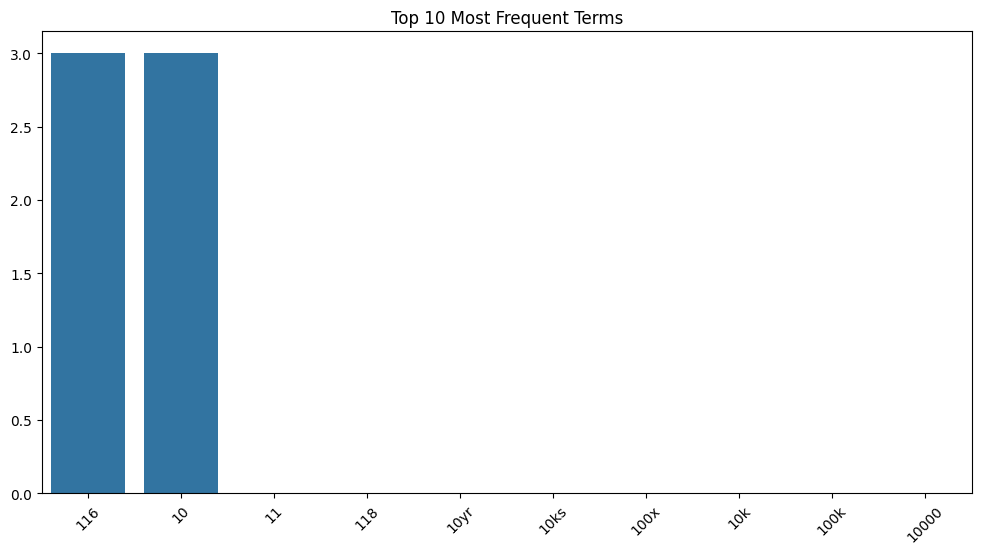

In [44]:
import numpy as np

# 對所有文檔計算每個詞的出現次數總和
term_frequencies = np.array(df_counts[0:20, 0:20].sum(axis=0)).flatten()

# 找出出現最多的前 10 個詞
top_terms_idx = term_frequencies.argsort()[::-1][:10]
top_terms = count_vect.get_feature_names_out()[top_terms_idx]
top_counts = term_frequencies[top_terms_idx]

print("出現頻率最高的 10 個詞：")
for t, c in zip(top_terms, top_counts):
    print(f"{t}: {c}")

doc_lengths = np.array(df_counts.sum(axis=1)).flatten()


print("前 10 篇文檔的詞數：", doc_lengths[:10])
density = df_counts.nnz / (df_counts.shape[0] * df_counts.shape[1])
print(f"矩陣密度: {density:.6f} (非零元素比例)")
top_terms_idx = term_frequencies.argsort()[::-1][:50]
subset_sparse = df_counts[:, top_terms_idx]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_counts)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Terms")
plt.show()


In [45]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))


In [46]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [47]:
term_frequencies[0]

np.int64(4)

/tmp/ipython-input-1135719481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


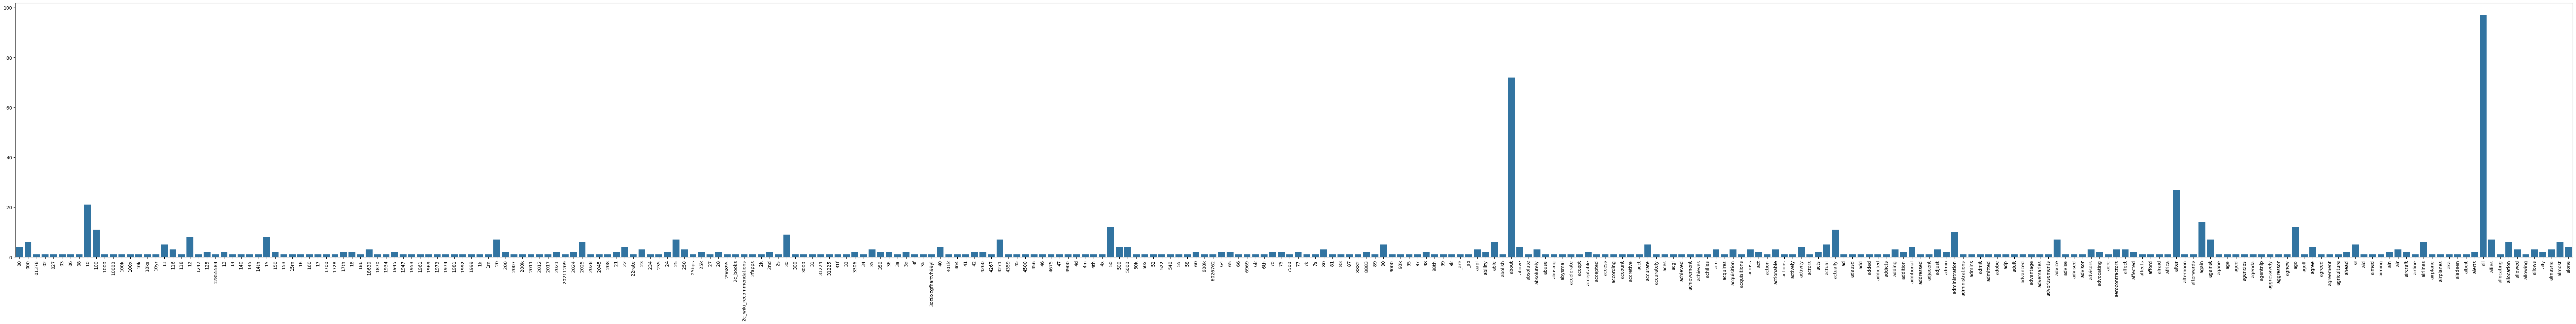

In [48]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [49]:
# Answer here
import plotly.express as px

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_n = 300
terms = count_vect.get_feature_names_out()[:top_n]
counts = term_frequencies[:top_n]

# Plotly 互動柱狀圖
fig = px.bar(x=terms, y=counts,
             labels={'x':'Terms', 'y':'Frequency'},
             title=f"Top {top_n} Terms Frequency")
fig.update_layout(xaxis_tickangle=-90, width=1500, height=600)
fig.show()

/tmp/ipython-input-1588227194.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



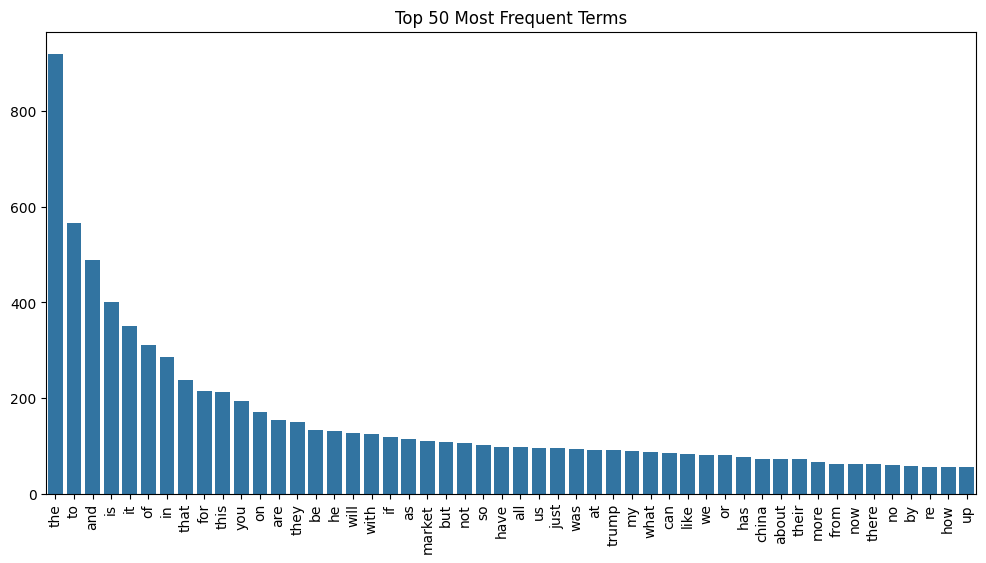

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 取出前 50 高頻詞
top_n = 50
top_idx = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_counts = term_frequencies[top_idx]

# 畫柱狀圖
plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_terms, y=top_counts)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f"Top {top_n} Most Frequent Terms")
plt.show()


/tmp/ipython-input-525060673.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



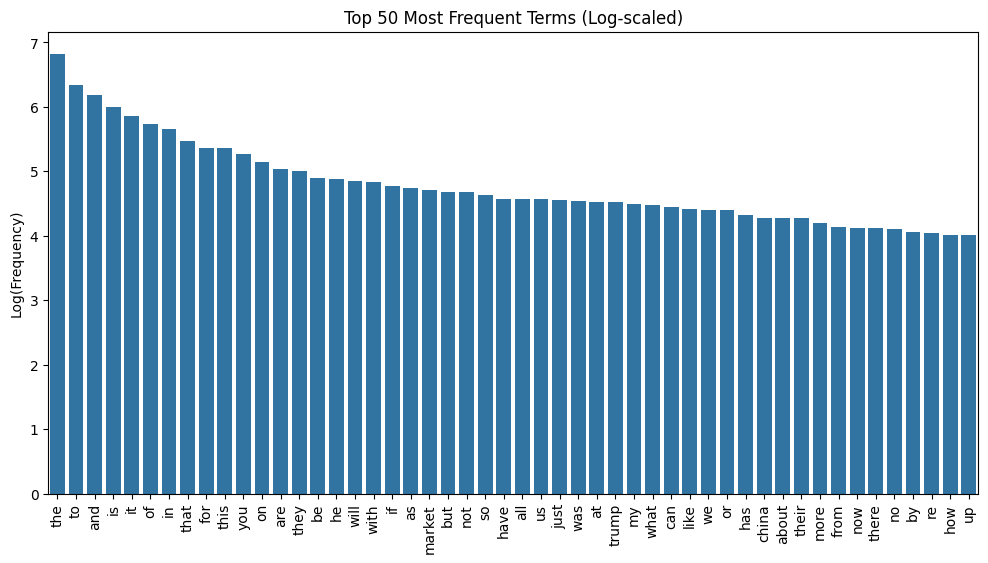

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 計算每個詞的總出現頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n=50
top_idx = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_counts = term_frequencies[top_idx]

# 對數轉換，避免 log(0)
top_counts_log = [math.log(i) for i in top_counts]

# 畫對數頻率柱狀圖
plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_terms, y=top_counts_log)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f"Top {top_n} Most Frequent Terms (Log-scaled)")
plt.ylabel("Log(Frequency)")
plt.show()


# Third part: WordCloud

In [52]:
datapath = "/content/newdataset/Reddit-stock-sentiment.csv"

import pandas as pd


df = pd.read_csv(datapath)
display(df.head())

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [53]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))
df['downvotes'] = df['downvotes'].fillna(float(0.0))
df['upvote_ratio'] = df['upvote_ratio'].fillna(float(1.00))

In [54]:
df_sample = df.sample(n=len(df)//2)
df_sample

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
551,comment,2024-05-06 13:53:28,l2tw64h,stockstobuytoday,Safe & Green Holdings (NASDAQ: SGBX) Stock Bul...,TraderMoe1224,https://abbonews.com/us-markets/safe-green-hol...,2,0.0,1.0,Got it!,0.000000,0.000000,0.0,[],0.0
644,comment,2025-04-11 10:55:14,mmjj3nx,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,Penny_Gold,https://www.reddit.com/r/stocks/comments/1jwlr...,-6,0.0,1.0,I reckon it’s a short squeeze today,0.300000,0.000000,0.0,"['today', 'squeeze']",1.0
492,comment,2025-04-11 20:45:34,mmmkx7u,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,GoogleKushforLunch,https://www.reddit.com/r/wallstreetbets/commen...,10,0.0,1.0,Holding over the weekend kind of scared,0.900000,0.600000,1.0,"['kind', 'weekend']",-1.0
93,comment,2025-04-10 14:58:22,mmecl9h,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,dancness,https://www.reddit.com/r/stocks/comments/1jvzr...,294,0.0,1.0,1. Make middle class homeless by causing hype...,0.340000,-0.100000,-1.0,"['hyperinflation', 'homeless', 'labor', 'Make'...",-1.0
242,comment,2025-04-12 2:07:37,mmo2t34,wallstreetbets,Someone post the hotline please.,mojomoreddit,https://i.redd.it/tcfuu97p7bue1.jpeg,0,0.0,1.0,That’s what you get when u bet against America,0.000000,0.000000,0.0,"['bet', 'America']",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,comment,2025-04-11 15:33:32,mmkuflw,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,ivegotwonderfulnews,https://www.reddit.com/r/stocks/comments/1jwlr...,2,0.0,1.0,wholesale ask premium on 1 oz credit suisse in...,0.900000,-0.600000,-1.0,"['yesterday', 'credit', 'ask', 'premium', 'sui...",0.0
716,comment,2025-04-11 8:58:42,mmj77q3,stocks,BREAKING: China raises tariffs on U.S. goods t...,HomingSunlight,https://www.reddit.com/r/stocks/comments/1jwku...,-2,0.0,1.0,"I forgot to cancel selling my mutual funds, ma...",0.535714,0.285714,1.0,"['call', 'right']",0.0
555,comment,2025-04-10 15:04:58,mmedxbl,StockMarket,How do you feel about a sitting president maki...,Ok_Cap9240,https://apnews.com/article/trump-truth-social-...,1,0.0,1.0,My feelings will get me sent to El Salvador,0.000000,0.000000,0.0,"['Salvador', 'El']",-1.0
90,comment,2021-02-01 15:48:53,glm0j5r,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",squidwardTalks,https://www.reddit.com/r/stocks/comments/la34b...,1,0.0,1.0,It was on Good morning america as well.,0.600000,0.700000,1.0,"['america', 'morning']",0.0


In [55]:
df_subset = df[["text", "entities", "title", "sentiment"]]
df_subset = df_subset.sort_values(by="sentiment", ascending=False).reset_index(drop=True)
df_subset

,text,entities,title,sentiment
0,"this sub has ruined emails for me, whenever I ...","['sub', 'WSB', 'Best']",Weekend Discussion Thread for the Weekend of A...,1.0
1,"\nI’ve been doing pretty good with this, but i...","['Tltw', 'Brkb', 'Upro', 'Msci/Nvda', 't', '%'...",Rate My Portfolio - r/Stocks Quarterly Thread ...,1.0
2,"Exciting, I guess that’s one way to characteri...","['Exciting', '’', 'way']",Trump: We Are Doing Really Well On Our Tariff ...,1.0
3,That's how you get black market lol \n\nChina ...,"['loophole', 'market', 'China']",BREAKING: China raises tariffs on U.S. goods t...,1.0
4,Stunt as in like why did they even make a big ...,"['Stunt', 'company', 'deal', 'place']",Retail giant TARGET has now declined for 10 co...,1.0
...,...,...,...,...
842,I work in finance writing (sort of) and it’s i...,"['online', 'insane', 'gold', 'writing', 'oil',...","It's fucking awful seeing the ""Silver"" misinfo...",-1.0
843,"how the fuck do you bankrupt a casino, you jus...","['pour', 'idiots/gambling', 'money', 'fuck', '...","Trump is surrounded by a bunch of idiots, he s...",-1.0
844,"US Treasuries were the safe haven, but now eve...","['reason', 'behaviour', 'one', 'the orange mes...",$ U.S. dollar value (crashing),-1.0
845,Trump will respond to china increasing their t...,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",Is the market in complete denial right now?,-1.0


In [56]:
df_subset["sentiment"].value_counts()

,count
sentiment,
0.0,331
1.0,319
-1.0,197


sentiment 1

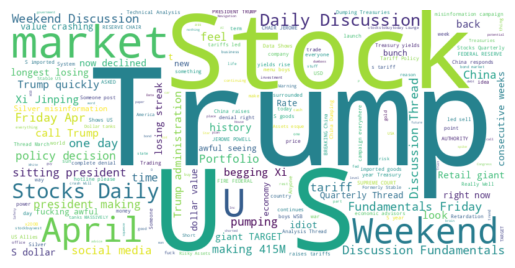

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ast

all_text = ""
for i in range(0,319):
    row_text = df.loc[i, "text"]
    row_entities = " ".join(ast.literal_eval(df.loc[i, "entities"]))
    row_title = df.loc[i, "title"]
    all_text += f"{row_title} {row_entities} "


wc = WordCloud(width=800,height=400,background_color="white",stopwords=STOPWORDS).generate(all_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

sentiment 0

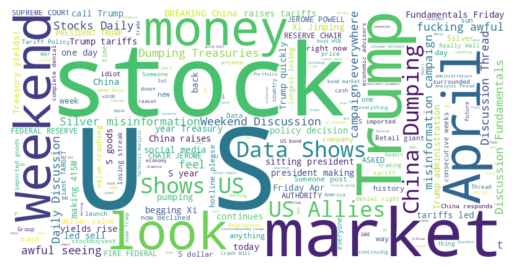

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ast

all_text = ""
for i in range(319,650):
    row_text = df.loc[i, "text"]
    row_entities = " ".join(ast.literal_eval(df.loc[i, "entities"]))
    row_title = df.loc[i, "title"]
    all_text += f"{row_title} {row_entities} "


wc = WordCloud(width=800,height=400,background_color="white",stopwords=STOPWORDS).generate(all_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

sentiment -1

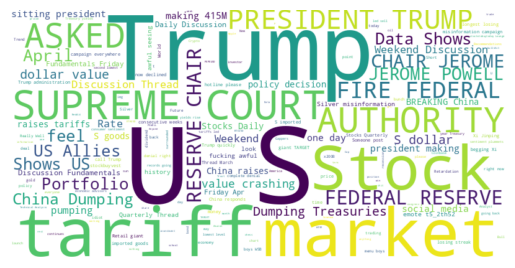

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ast

all_text = ""
for i in range(650,847):
    row_text = df.loc[i, "text"]
    row_entities = " ".join(ast.literal_eval(df.loc[i, "entities"]))
    row_title = df.loc[i, "title"]
    all_text += f"{row_title} {row_entities} "


wc = WordCloud(width=800,height=400,background_color="white",stopwords=STOPWORDS).generate(all_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
#上面是根據 sentiment 的標籤畫的 wordcloud，但是沒有什麼獨特性，1,0,-1 的 wordcloud 長得都差不多，
#但還是可以從 sentiment 0 圖中發現一些字如 Trump, US , stock 這些字，可能是因為這些文章本來就是在討論經濟相關的新聞，

# Phase 2

In [61]:
### Begin Assignment Here
df['subreddit'].value_counts()

,count
subreddit,
stocks,274
StockMarket,250
stockstobuytoday,174
wallstreetbets,149


In [62]:
df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,1.00,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.00,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,1.00,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,1.00,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,0.0,1.00,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,0.0,1.00,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [64]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=3 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category stocks:


,00,000,02,03,06,10,100,10000,10ks,10yr,...,you,young,your,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


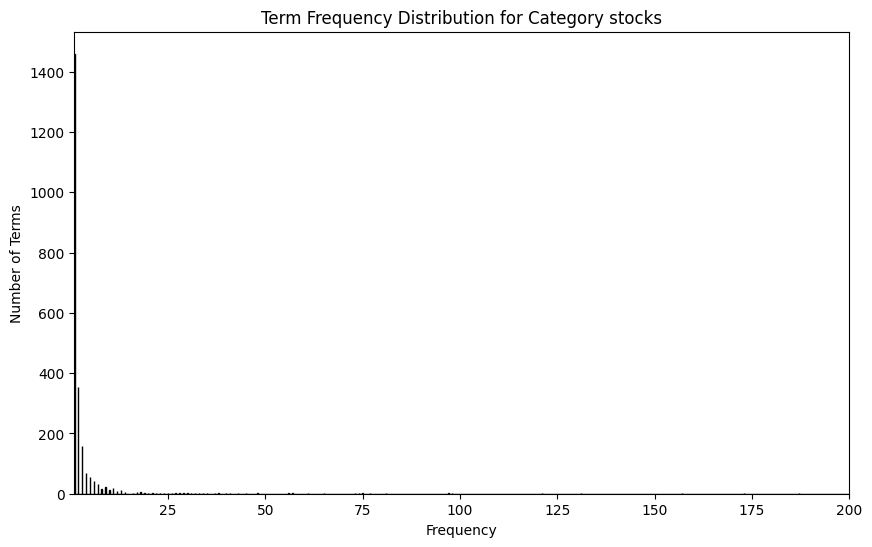

In [65]:
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [66]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: wallstreetbets
Number of terms in top 5%: 48
Filtered terms: ['to', 'the', 'it', 'and', 'in', 'is', 'you', 'for', 'they', 'this', 'of', 'my', 'that', 'on', 't5_2th52', 'emote', 'img', 'so', 'like', 'but', 'can', 'just', 'at', 'are', 'have', 'over', 'all', 'was', 'target', 'will', 'be', 'now', 'not', 'we', 'about', 'there', 'what', 'puts', 'no', 'good', 'up', 'make', 'she', 're', 'time', 'with', 'still', 'market']


In [67]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

np.int64(57)

In [68]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: wallstreetbets
Number of terms in bottom 1%: 9
Filtered terms: ['31224', '31225', '350', '1981', '1m', '20', '200k', '2012', '2021']


In [69]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following words:
B

,10,100,1000,10k,12,17th,186,18630,1934,208,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.149193548387096
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.355206529309571
Variance in Transaction Sizes : 153.2691491445736
Sparsity : 0.9932293572058792


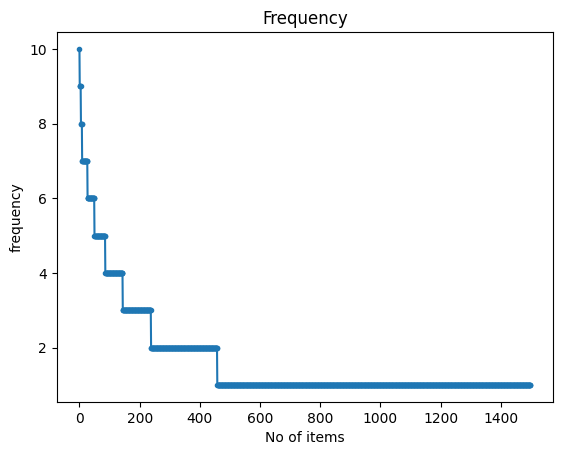

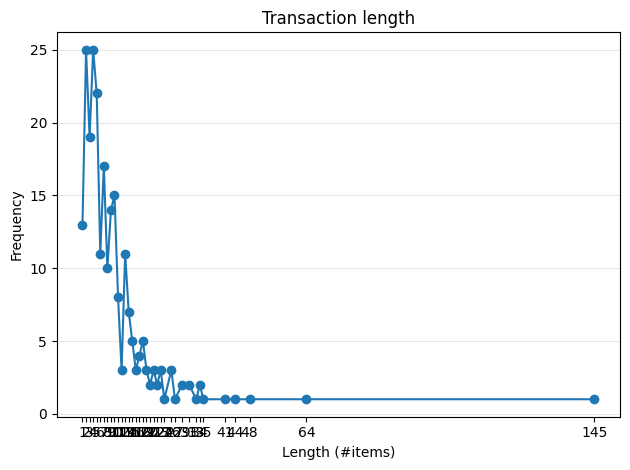

In [71]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.299270072992702
Maximum Transaction Size : 164
Standard Deviation Transaction Size : 16.962330512093942
Variance in Transaction Sizes : 288.7745782198337
Sparsity : 0.9935180099397132


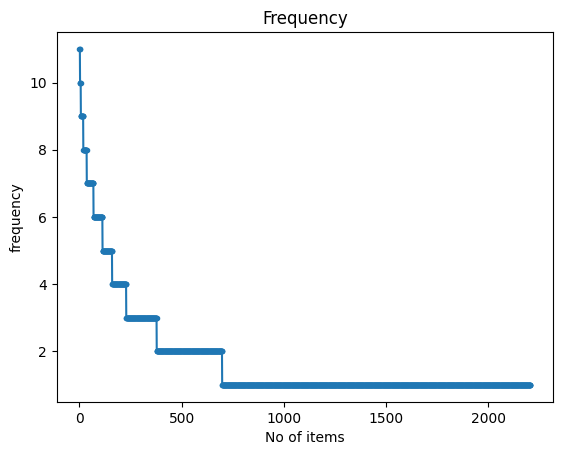

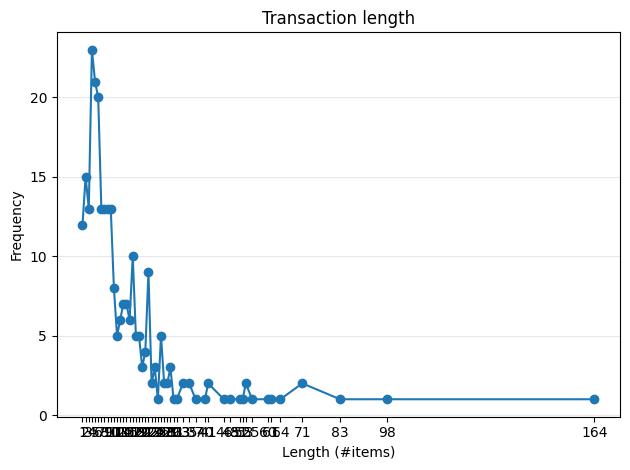

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 172
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.046511627906977
Maximum Transaction Size : 217
Standard Deviation Transaction Size : 25.5915624616124
Variance in Transaction Sizes : 658.7580579355365
Sparsity : 0.9907710173272621


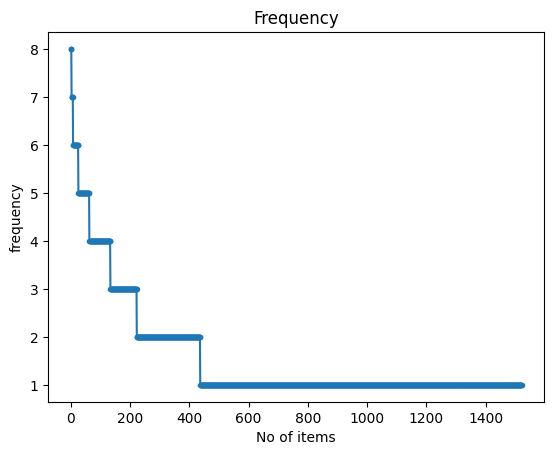

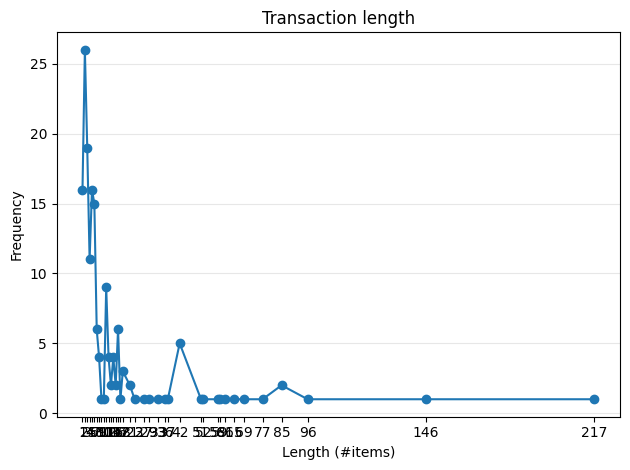

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 145
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.379310344827585
Maximum Transaction Size : 64
Standard Deviation Transaction Size : 9.441704233596845
Variance in Transaction Sizes : 89.76484674329502
Sparsity : 0.9897493876012813


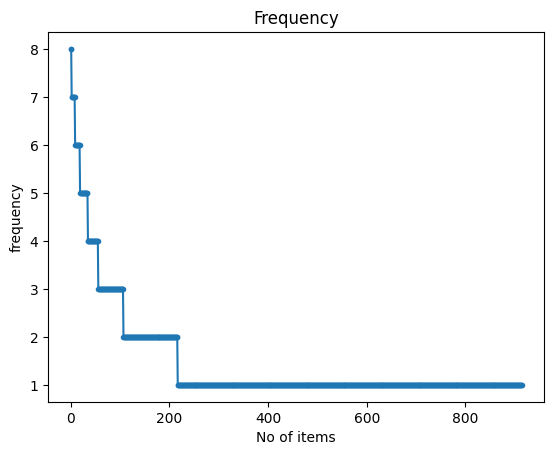

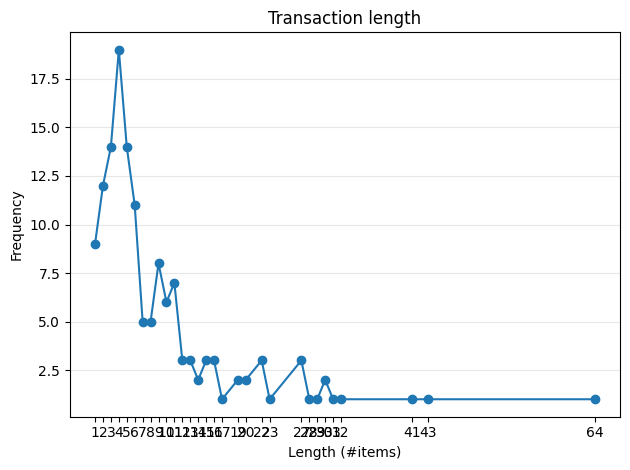

In [74]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [75]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='/content/td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
td_freq_db_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(td_freq_db_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 5
Runtime: 0.0019328594207763672


In [76]:
obj1.save('/content/td_freq_db_StockMarket.txt') #save the patterns
td_freq_db_StockMarket

,Patterns,Support
0,why,9
1,way,9
2,want,9
3,than,9
4,other,10


In [77]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='/content/td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
td_freq_db_stocks= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(td_freq_db_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.005593299865722656


In [78]:
obj2.save('td_freq_db_stocks.txt') #save the patterns
td_freq_db_stocks

,Patterns,Support
0,looking,9
1,ve,9
2,right,9
3,buying,9
4,seems,9
5,still,9
6,country,9
7,reason,9
8,make,9
9,way,9


In [79]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='/content/td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
td_freq_db_stockstobuytoday= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(td_freq_db_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0039517879486083984


In [80]:
obj3.save('td_freq_db_stockstobuytoday.txt') #save the patterns
td_freq_db_stockstobuytoday

,Patterns,Support


In [81]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='/content/td_freq_db_wallstreetbets.csv', minSup=minSup)
obj3.mine()
td_freq_db_wallstreetbets= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(td_freq_db_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0020813941955566406


In [82]:
obj3.save('td_freq_db_wallstreetbets.txt') #save the patterns
td_freq_db_wallstreetbets

,Patterns,Support


In [83]:
#the fastest and stupidest to fix cover df data
df_homework=df

In [84]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [td_freq_db_StockMarket, td_freq_db_stocks, td_freq_db_stockstobuytoday, td_freq_db_wallstreetbets]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
21      get      11
20    since      11
19     also      11
3     other      10
18     know      10
17      bad      10
16     shit      10
15      him      10
12     make       9
14   reddit       9
13   better       9
0       why       9
1      want       9
10  country       9
9     still       9
8     seems       9
7    buying       9
6     right       9
5        ve       9
4   looking       9
2      than       9
11   reason       9
Number of patterns discarded: 2


In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df_homework['text'])
terms = count_vect.get_feature_names_out()


df_homework['tokenized_text'] = df_homework['text'].str.split().apply(set)


pattern_matrix = pd.DataFrame(0, index=df_homework.index, columns=final_pattern_df['Patterns'])


for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df_homework['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)


tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df_homework.index)


augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,want,country,still,seems,buying,right,ve,looking,than,reason
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
import PAMI.frequentPattern as fp
dir(fp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'basic']

In [87]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg


for minSup in [3, 6, 9]:
    print(f"\n===== MaxFPGrowth (minSup={minSup}) =====")


    obj = alg.MaxFPGrowth(iFile='/content/td_freq_db_StockMarket.csv', minSup=minSup, sep='\t')


    obj.mine()


    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()


    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics)))
    print('Runtime: ' + str(obj.getRuntime()))

    csv_filename = f'td_freq_db_StockMarket{minSup}.csv'
    frequentPatternsDF_comp_graphics.to_csv(csv_filename, index=False)
    print(f"Patterns saved to CSV: {csv_filename}")


    print(frequentPatternsDF_comp_graphics.head())


===== MaxFPGrowth (minSup=3) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 228
Runtime: 0.01361227035522461
Patterns saved to CSV: td_freq_db_StockMarket3.csv
    Patterns  Support
0  bankrupt         3
1       win         3
2    casino         3
3    leader         3
4      stop         3

===== MaxFPGrowth (minSup=6) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 50
Runtime: 0.0026950836181640625
Patterns saved to CSV: td_freq_db_StockMarket6.csv
    Patterns  Support
0    dollar         6
1  anything         6
2    enough         6
3   nothing         6
4     still         6

===== MaxFPGrowth (minSup=9) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 5
Runtime: 0.0017802715301513672
Patterns saved to CSV: td_freq_db_StockMarket9.csv
  Patterns  Support
0    than         9
1    want        

In [88]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt


X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

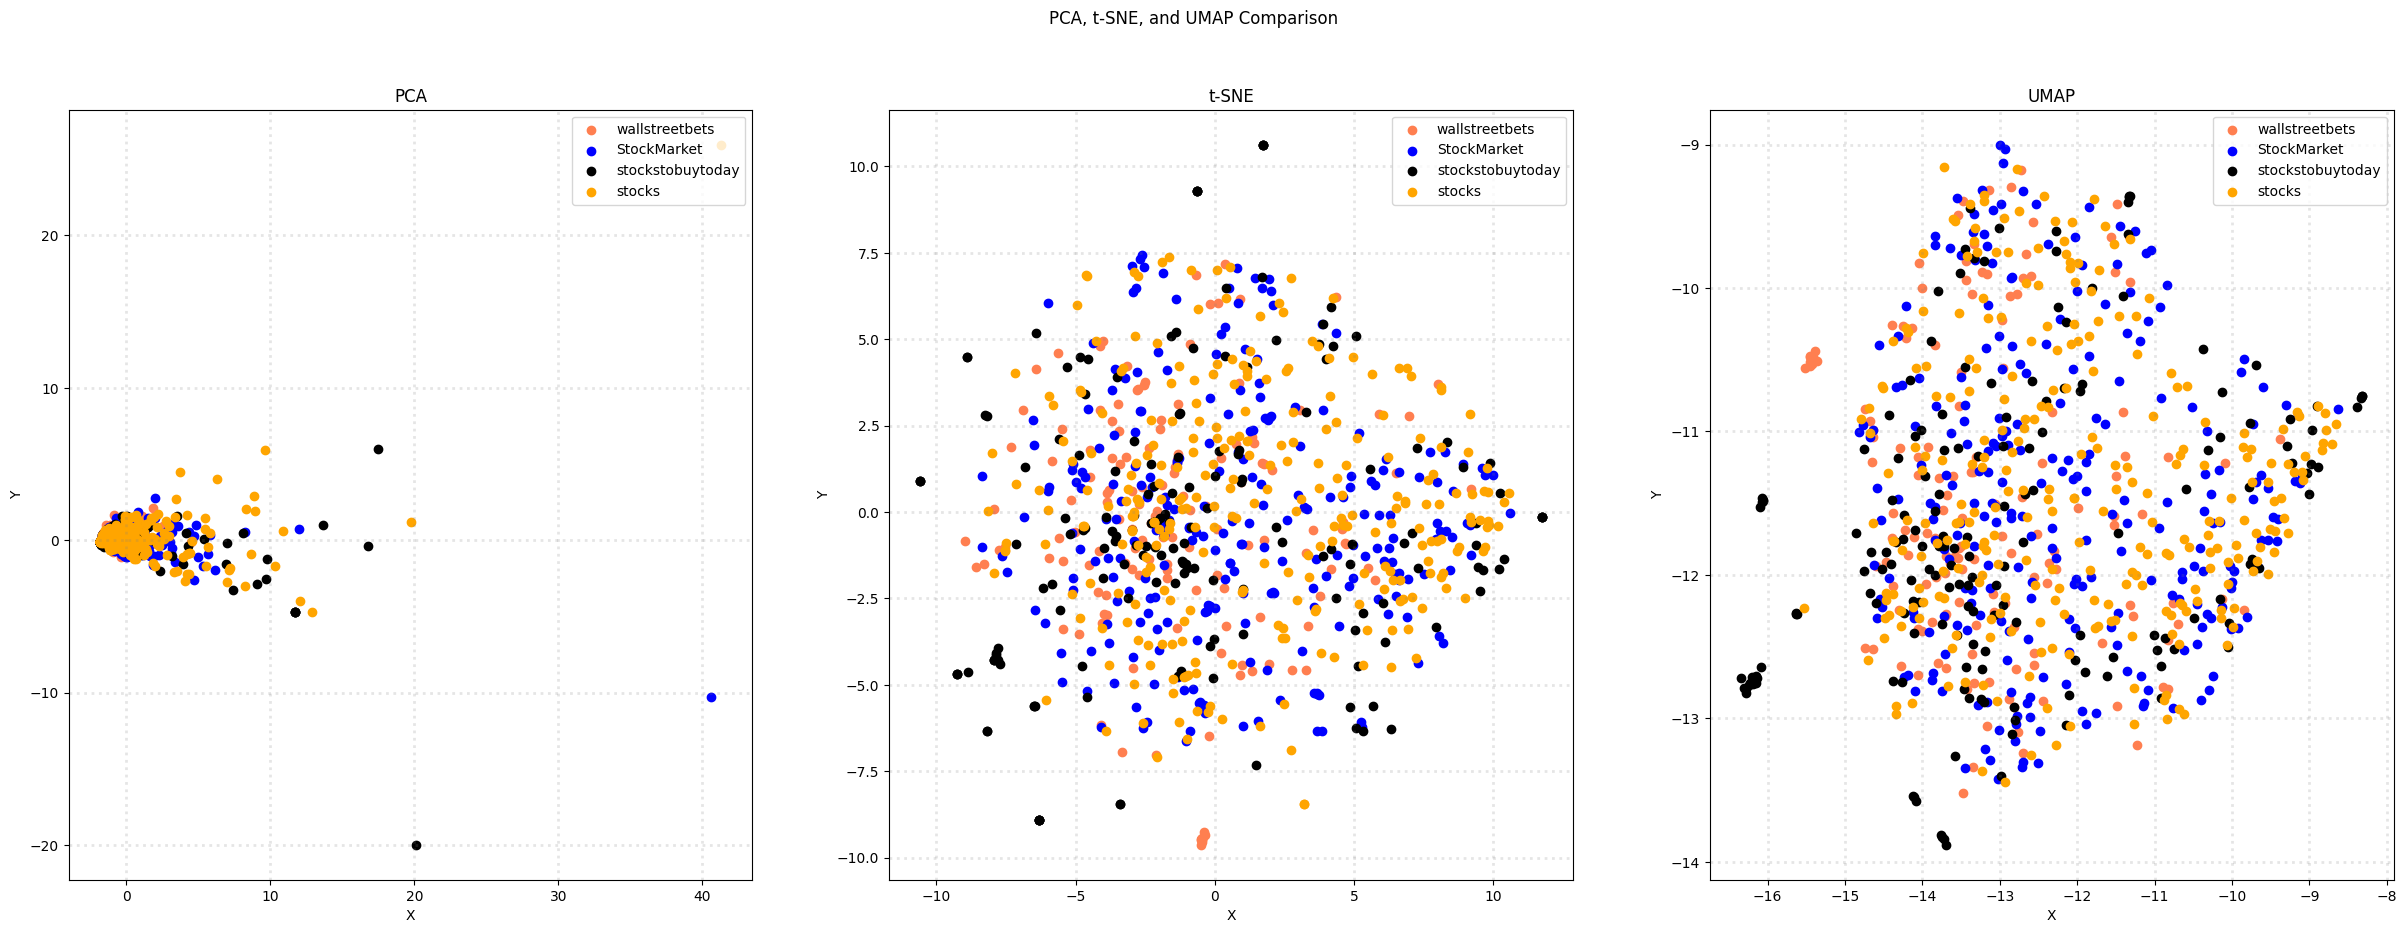

In [89]:
col = ['coral', 'blue', 'black', 'orange']
categories = df_homework['subreddit'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')


def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_homework['subreddit'] == category].T[0]
        ys = X_reduced[df_homework['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')


plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [90]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

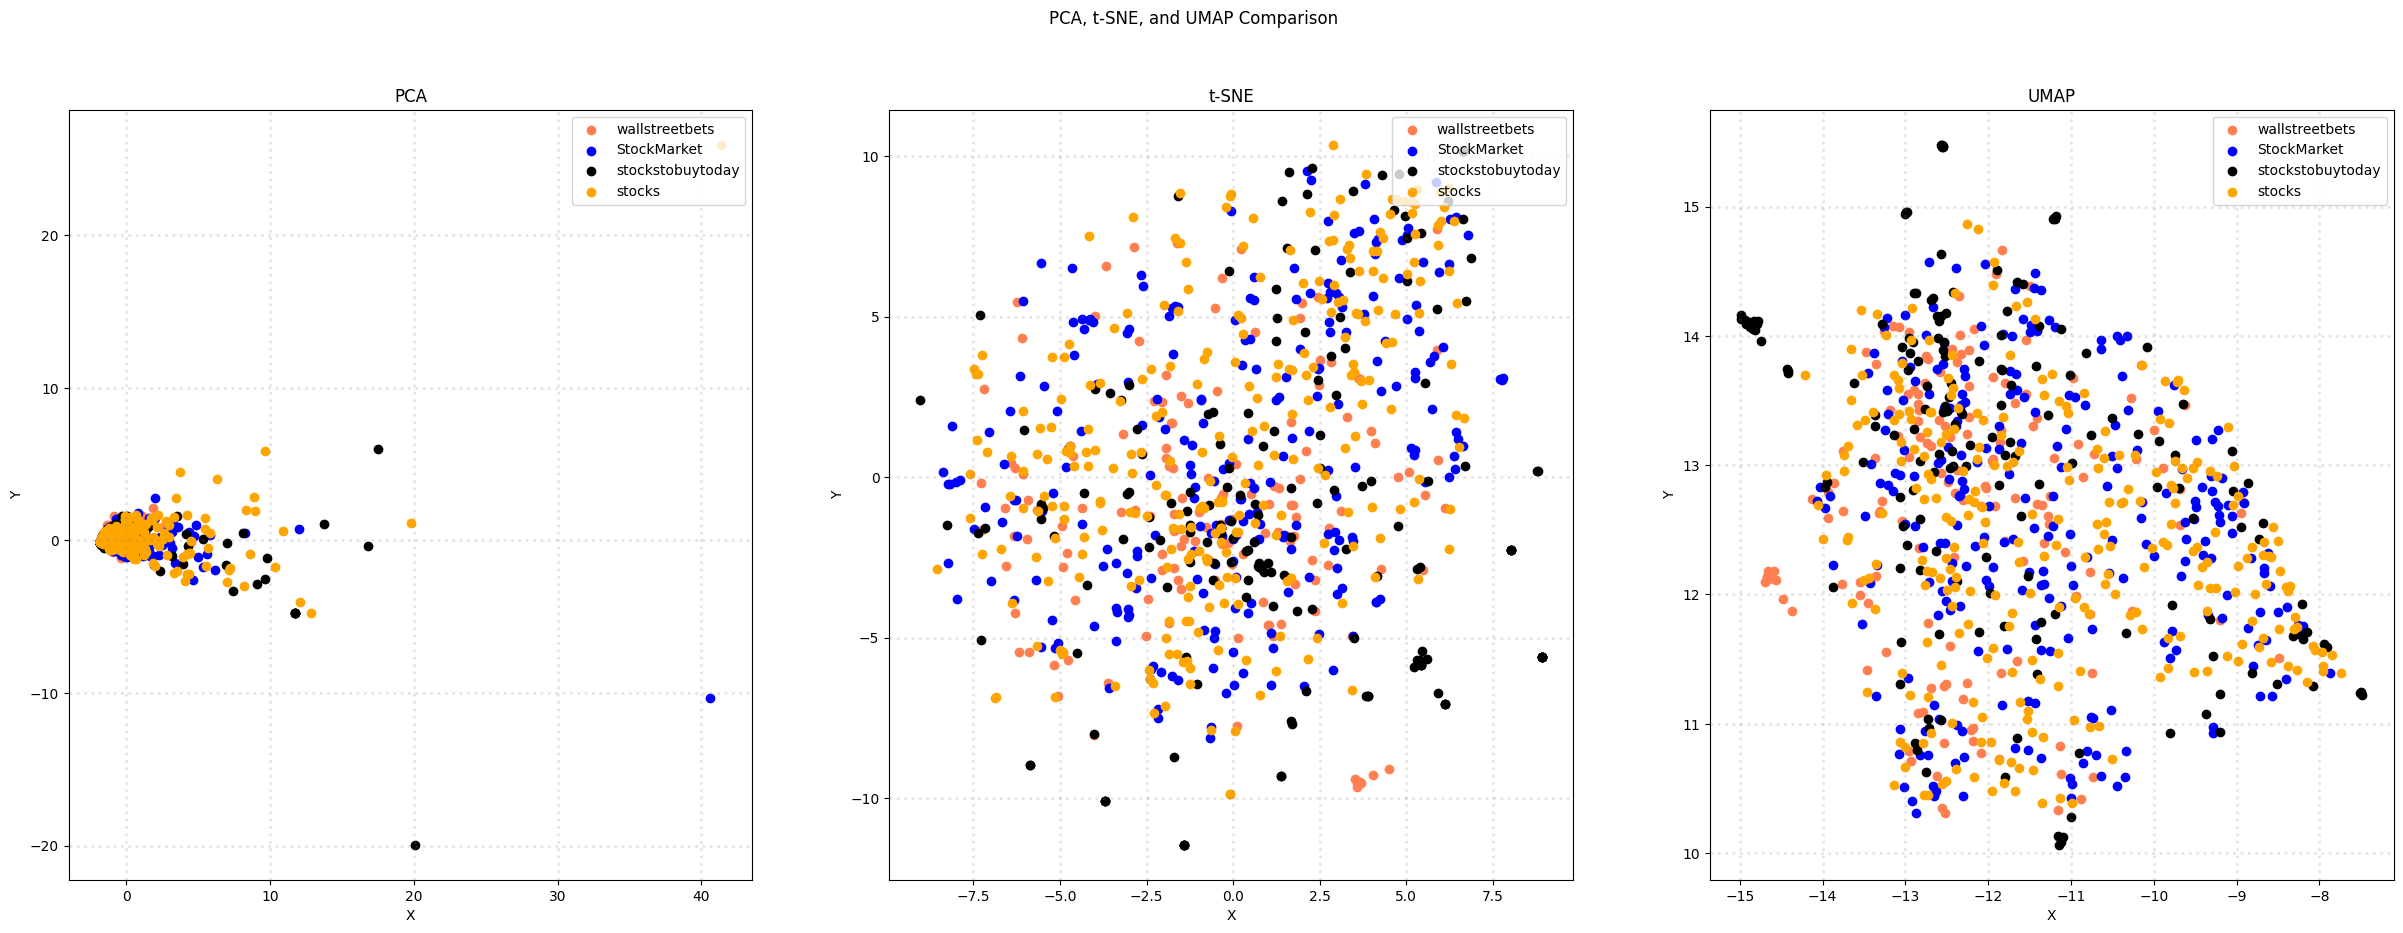

In [91]:
col = ['coral', 'blue', 'black', 'orange']
categories = df_homework['subreddit'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')


def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_homework['subreddit'] == category].T[0]
        ys = X_reduced[df_homework['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [93]:
mlb = preprocessing.LabelBinarizer()

In [94]:
mlb.fit(df_homework.subreddit)

LabelBinarizer()

In [95]:
df_homework['bin_category'] = mlb.transform(df_homework['subreddit']).tolist()

In [96]:
df_homework[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,1.00,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"{Calls, retards, on}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.00,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"{the, about, ever., place?, they, No, even, po...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,1.00,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"{the, in, ticker., Seeing, lots, red, of}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"{Torrente, about, skill,, Torrente., isn't, To...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,1.00,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"{you., thank, He, didn’t, say}","[1, 0, 0, 0]"
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,0.0,1.00,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"{ejaculate, in, to, wet, puss, wish, luck, war...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,0.0,1.00,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"{the, Powell., can, next, downwards, fire, wee...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,0.0,1.00,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"{trap., spread, have, it, we, by, Its, like, b...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,0.0,1.00,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"{the, here?, folks., week, pivot, &, 52, only,...","[0, 1, 0, 0]"


In [97]:
document_to_transform_1 = []
random_record_1 = df_homework.iloc[1]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_homework.iloc[2]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_homework.iloc[3]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [98]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']
['Seeing lots of red in the ticker.']
["Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.\n\n**Highlight Main Points**\n\n* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.\n* The feat highlights the power of electric boating and pushes the limits of innovation.\n* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.\n\n**TLDR**\n\nHold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed

In [99]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [100]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.200446
Cosine Similarity using count bw 1 and 3: 0.188222
Cosine Similarity using count bw 2 and 3: 0.249126
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipython-input-241309908.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipython-input-241309908.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipython-input-241309908.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipython-input-241309908.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

In [101]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
# Convert lists in 'bin_category' to tuples to make them hashable
df_homework['bin_category_tuple'] = df_homework['bin_category'].apply(tuple)
category_mapping = dict(df_homework[['bin_category_tuple', 'subreddit']].drop_duplicates().values)


# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_homework['subreddit'], test_size=0.3, random_state=42)



In [102]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y_train

,subreddit
739,stocks
140,stocks
173,stockstobuytoday
6,stocks
552,stocks
...,...
71,StockMarket
106,StockMarket
270,StockMarket
435,StockMarket


In [105]:
y_test

,subreddit
457,StockMarket
342,wallstreetbets
280,StockMarket
275,wallstreetbets
843,StockMarket
...,...
766,StockMarket
548,StockMarket
351,stockstobuytoday
136,stocks


In [106]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5570    0.6111    0.5828        72
stockstobuytoday     0.4885    0.7356    0.5872        87
          stocks     0.7826    0.3673    0.5000        49
     StockMarket     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: 合併 TDM 和 pattern matrix
tdm_augmented = pd.concat([tdm_df, pattern_matrix], axis=1)

# Step 2: 建立分類標籤對應
df_homework['bin_category_tuple'] = df_homework['bin_category'].apply(tuple)
category_mapping = dict(df_homework[['subreddit', 'bin_category_tuple']].drop_duplicates().values)
target_names = [' '.join(map(str, category_mapping[label])) for label in sorted(category_mapping.keys())]  # ✅ 修正重點

# Step 3: 分割資料
X_train, X_test, y_train, y_test = train_test_split(
    tdm_augmented,
    df_homework['subreddit'],
    test_size=0.3,
    random_state=42
)

# Step 4: 訓練多項式貝氏分類器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 5: 預測與評估
y_pred = nb_classifier.predict(X_test)

print("Accuracy (with patterns):", accuracy_score(y_test, y_pred))
print("\nClassification Report (with patterns):\n",
      classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (with patterns): 0.5490196078431373

Classification Report (with patterns):
               precision    recall  f1-score   support

     1 0 0 0     0.5422    0.6250    0.5806        72
     0 1 0 0     0.4921    0.7126    0.5822        87
     0 0 1 0     0.7500    0.3673    0.4932        49
     0 0 0 1     0.6818    0.3191    0.4348        47

    accuracy                         0.5490       255
   macro avg     0.6165    0.5060    0.5227       255
weighted avg     0.5907    0.5490    0.5375       255



In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_homework['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
               precision    recall  f1-score   support

     1 0 0 0     0.4156    0.4444    0.4295        72
     0 1 0 0     0.4930    0.4023    0.4430        87
     0 0 1 0     0.5581    0.4898    0.5217        49
     0 0 0 1     0.3281    0.4468    0.3784        47

    accuracy                         0.4392       255
   macro avg     0.4487    0.4458    0.4432       255
weighted avg     0.4533    0.4392    0.4424       255



<h1>Third:Generate TF-IDF features


In [116]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk


df = pd.read_csv("/content/newdataset/Reddit-stock-sentiment.csv")

#根據lab1 phase1 的結果
df['downvotes'] = df['downvotes'].fillna(float(0.0))
df['upvote_ratio'] = df['upvote_ratio'].fillna(float(1.00))


X_text = df["text"].astype(str)
y = df["subreddit"]





# (a) Count Vectorizer + MultinomialNB
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
X_count = count_vectorizer.fit_transform(X_text)

# (b) TF-IDF Vectorizer + ComplementNB
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X_text)


scaler = StandardScaler(with_mean=False)
X_tfidf_scaled = scaler.fit_transform(X_tfidf)



Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_count, y, test_size=0.2, random_state=42)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf_scaled, y, test_size=0.2, random_state=42)


# (a) Count + MultinomialNB
nb_count = MultinomialNB()
nb_count.fit(Xc_train, yc_train)
y_pred_count = nb_count.predict(Xc_test)

# (b) TF-IDF + ComplementNB
nb_tfidf = ComplementNB()
nb_tfidf.fit(Xt_train, yt_train)
y_pred_tfidf = nb_tfidf.predict(Xt_test)


print("=== Count Vectorizer + MultinomialNB ===")
print("Accuracy:", accuracy_score(yc_test, y_pred_count))
print(classification_report(yc_test, y_pred_count))

print("\n=== TF-IDF + ComplementNB ===")
print("Accuracy:", accuracy_score(yt_test, y_pred_tfidf))
print(classification_report(yt_test, y_pred_tfidf))

=== Count Vectorizer + MultinomialNB ===
Accuracy: 0.5529411764705883
                  precision    recall  f1-score   support

     StockMarket       0.61      0.70      0.65        50
          stocks       0.47      0.70      0.56        60
stockstobuytoday       0.70      0.26      0.38        27
  wallstreetbets       0.71      0.30      0.43        33

        accuracy                           0.55       170
       macro avg       0.63      0.49      0.51       170
    weighted avg       0.60      0.55      0.53       170


=== TF-IDF + ComplementNB ===
Accuracy: 0.5294117647058824
                  precision    recall  f1-score   support

     StockMarket       0.57      0.50      0.53        50
          stocks       0.54      0.63      0.58        60
stockstobuytoday       0.54      0.52      0.53        27
  wallstreetbets       0.45      0.39      0.42        33

        accuracy                           0.53       170
       macro avg       0.52      0.51      0.51      

In [ ]:
# In this experiment, we built text classification models using CountVectorizer + MultinomialNB and TF-IDF + ComplementNB.
# The results show that the word frequency model achieved an accuracy of approximately 55%, performing well on high-frequency
# categories such as StockMarket and stocks, but with low recall for minority categories like stockstobuytoday and wallstreetbets.
# The TF-IDF model achieved about 53% accuracy, showing slight improvement on minority categories but a decrease in overall accuracy.
# This is caused by imbalanced class distributions, TF-IDF weighting reducing the impact of high-frequency words,
# and limitations of the Naive Bayes assumptions on feature distributions.

In [ ]:
# There was no normalization of word forms, such as stemming or lemmatization, causing different forms of the same word
# to be treated as separate features, which increased the dimensionality. Additionally, using the full vocabulary for both
# CountVectorizer and TF-IDF resulted in very sparse matrices, increasing computational cost. Furthermore, there was no handling
# of class imbalance, which led to poorer performance on minority classes.